# 0.) Import and Clean data

In [2]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
names = df[['country']].copy
X = df.drop(['country'],axis = 1)

In [6]:
scaler = StandardScaler().fit(X)

In [7]:
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters = 5).fit(X_scaled)

/Users/echoxyliu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [10]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

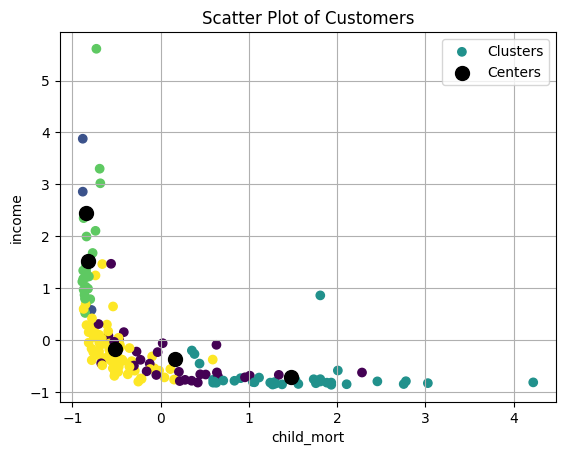

In [12]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 4


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [18]:
WCSSs = []
ks = range(1,15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = 'random')
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

In [ ]:
# Do in 1 line code
# WCSSs = [KMeans(n_clusters = k, n_init = 30, init = 'random').fit(X_scaled).inertia_ for k in range(1,15)]

In [19]:
WCSSs

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 700.3229986404374,
 631.3877859960571,
 550.7445797437365,
 508.9474311430954,
 454.9699223434418,
 427.58566311334346,
 413.56284086063863,
 370.26321194354887,
 355.68304923256545,
 337.67709598275457,
 316.4128861770943]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

[]

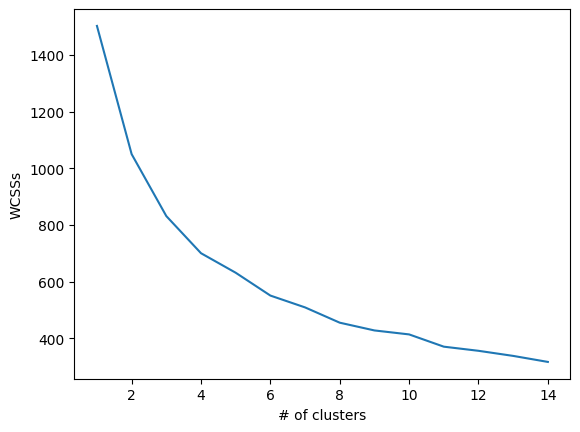

In [21]:
plt.plot(ks, WCSSs)
plt.xlabel('# of clusters')
plt.ylabel('WCSSs')
plt.plot()

# 6.) Do the same for a silhoutte plot

In [22]:
from sklearn.metrics import silhouette_score

In [24]:
SCs = []
ks = range(2,15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = 'random')
    kmeans.fit(X_scaled)
    labs = kmeans.labels_
    SCs.append(silhouette_score(X_scaled,labs))

[]

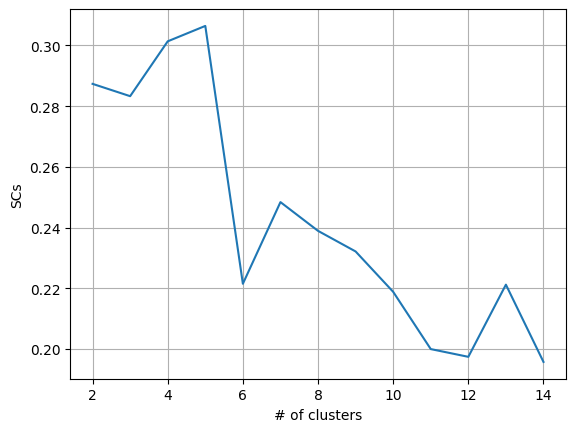

In [26]:
plt.plot(ks, SCs)
plt.xlabel('# of clusters')
plt.ylabel('SCs')
plt.grid()
plt.plot()

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [28]:
kmeans = KMeans(n_clusters = 2, n_init = 30, init = 'random').fit(X_scaled)

In [34]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [35]:
output = pd.concat([preds,df], axis = 1)

In [37]:
print("Cluster 1: ")
list(output.loc[output[0]==0,'country'])

Cluster 1: 


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

#### Write an observation
The countries in the first cluster are mainly located in Africa, Europe and Asia. Maybe they have some common characteristics reagrding international trade, demographic features, etc.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [39]:
# kmeans...
# unscale the output

In [41]:
output

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,0,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,1,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,1,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,0,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [42]:
output.drop('country',axis = 1).groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [45]:
output.drop('country',axis = 1).groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


# 9.) Write an observation about the descriptive statistics.

On average, compared to class 0, class 1 has lower child mortality, higher exports and imports, better health, much more income and gdpp, lower inflation, higher life expectation and lower total fert. 

Considering standard deviation, class 1 is lower in child mortality, inflation, life expectation and total_fer, and higher in other features.

Combining the two observations, class 1 might be more developed countries, but the social economic conditions can vary a lot among these countries.